# The Inverse Transform of RVs

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The idea

- [Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) is a basic method for [pseudo-random number sampling](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling), i.e. for generating sample numbers at random from any probability distribution given its cumulative distribution function. That is, by drawing from a uniform distribution, we make it possible to draw from the other distribution in question.

- Let's start by defining uniform distribution $U(0,1)$ which generates random numbers $Z\sim U(0,1)$ falling on $[0,1]$ range. Now let's look for a way of transforming random number $Z$ with $p(z)=\frac{1}{1-0}$ uniform pdf into a function $X(Z)$ where x is distributed according to some pdf $p(x)$. The probability to find $x$ between $x$ and $x+dx$ is equal to:

$$p(x)dx = p(z)dz = dz$$

- This relation is simply transform of variables. Now the key point to realize is that integrals from over $[-\infty, x(z)]$ for X and $[0, z]$ for Z are equal (these are cumulative distribution functions (CDF). 

$$
\int_{-\infty}^{x(z)} p(x') dx' = \int_0^z dz'= z
$$

- Thus, if we can (i) integrate expression on the left analytically and (ii) solve for $x$ then we are done! 
For most of the pdf at least one of the two is not possible. Below is a typical example where both (i) and (ii) states are easily done. 

#### Example: Drawing from the exponential distribution.

- For example, lets assume we would like
to generate random numbers that follow the exponential distribution
$$p(x) = \frac{1}{\lambda} e^{-x/\lambda}$$ 

- for $x\ge0$ and $f(x)=0$ otherwise. Following the recipe from the above we have

$$u = \int_{0}^{x} \frac{1}{\lambda} e^{-x'/\lambda} dx'  = 1- e^{-x/\lambda} $$ 

- Solving for $x$ we get

$$x = - \lambda \ln (1-u) $$

### Formalized procedure:

1. **Get a uniform sample $u$ from $U(0,1)$**
2. **Solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire.** 
3. **Repeat.** 

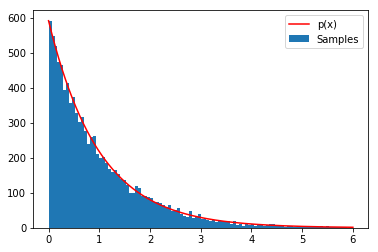

In [2]:
# Define the probability distribution function
p = lambda x: np.exp(-x)

# Compute its cumulative distribution function (CDF)
CDF = lambda x: 1 - np.exp(-x)

# Compute the inverse of the CDF
invCDF = lambda r: -np.log(1 - r)

# Define sampling limits
xmin, xmax = 0, 6  # Domain range
rmin, rmax = CDF(xmin), CDF(xmax)  # Range of CDF values

# Generate random samples
N = 10000
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# Compute histogram data
hist_vals, bin_edges = np.histogram(X, bins=100)

# Plot histogram of samples
plt.hist(X, bins=100, label='Samples', alpha=0.7, edgecolor='black')

# Overlay the theoretical probability density function (PDF)
x_vals = np.linspace(xmin, xmax, 1000)
plt.plot(x_vals, hist_vals[0] * p(x_vals), 'r', linewidth=2, label='p(x)')

# Display legend and formatting
plt.legend()
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Inverse Transform Sampling of an Exponential Distribution')
plt.grid(alpha=0.3)
plt.show()